## Lesson 6 - Targeted Marketing Campaign
### Author: Ana Javed

### Workplace Scenario

Cypress from New Ventures Department has found a banking client who wants to do a targeted marketing campaign for a specialty investment product to some of its customers. Cypress stresses that the bank only wants to spend the effort on customers who are likely to say yes; last year they used a different company to generate an algorithm and ended up spamming many of their customers with products they didn't want.

Now that you know a few ensemble models to improve a classification model let's try it out in this assignment.

### Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the Bank Data csv file, create a new notebook to train, test, and evaluate an ensemble model. Perform each of the following tasks and answer the related questions:

- Read in, parse, and pre-process the data
- Perform a brief exploratory analysis
- Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
- Graph the structure of your decision tree
- Graph the confusion matrix of your random forest model



In [164]:
## Importing Necessary Libraries & Packages 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime as dt
import csv
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Declaring inline visualizations 
%matplotlib inline


### 1. Read in, parse, and pre-process the data

In [165]:
# ## Reading data file into Dataframe 
url = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/Bank%20Data.csv'
df = pd.read_csv(url, sep=",")

## First 5 Rows from Dataframe
# df.head()

In [166]:
## Conducting Exploratory Data Analysis: 
print(df.shape)  # (600, 11)
print(df.dtypes) 
print(df.describe()) 

(600, 11)
age              int64
sex             object
region          object
income         float64
married         object
children         int64
car             object
save_act        object
current_act     object
mortgage        object
pep             object
dtype: object
              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000


In [167]:
# Changing Binary Category Columns to 0 and 1: 
df['sex'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})
df['married'] = df['married'].map({'NO': 0, 'YES': 1})
df['save_act'] = df['save_act'].map({'NO': 0, 'YES': 1})
df['current_act'] = df['current_act'].map({'NO': 0, 'YES': 1})
df['mortgage'] = df['mortgage'].map({'NO': 0, 'YES': 1})
df['pep'] = df['pep'].map({'NO': 0, 'YES': 1})
df['car'] = df['car'].map({'NO': 0, 'YES': 1})
df['children'] = df['children'].map({0: 'None', 1: 'One', 2:'Two', 3:'Three'})


## Making region and children One-hot encoded columns 
df_expanded = pd.get_dummies(df, columns = ["children", "region"])

In [168]:
## Columns after One-Hot Encoding: 
print(df_expanded.shape)  # (600, 17)
print(df_expanded.dtypes) 

(600, 17)
age                    int64
sex                    int64
income               float64
married                int64
car                    int64
save_act               int64
current_act            int64
mortgage               int64
pep                    int64
children_None          uint8
children_One           uint8
children_Three         uint8
children_Two           uint8
region_INNER_CITY      uint8
region_RURAL           uint8
region_SUBURBAN        uint8
region_TOWN            uint8
dtype: object


In [169]:
## Function to Find Missing Values (if any)
def replace_missing_values(df):
    for each in df.columns:
        if df.loc[:, each].dtype in ('float64', 'int64'):
            df.loc[:, each] = pd.to_numeric(df.loc[:, each], errors='coerce')
            HasNan1 = np.isnan(df.loc[:, each] )
            print("Number of missing values removed in " + each + " column:", sum(HasNan1)) 
            # df.loc[HasNan1, each] = np.nanmedian(df.loc[:, each] )

replace_missing_values(df_expanded)

## No missing values in the columns, can proceed with the analysis! 

Number of missing values removed in age column: 0
Number of missing values removed in sex column: 0
Number of missing values removed in income column: 0
Number of missing values removed in married column: 0
Number of missing values removed in car column: 0
Number of missing values removed in save_act column: 0
Number of missing values removed in current_act column: 0
Number of missing values removed in mortgage column: 0
Number of missing values removed in pep column: 0


### 2. Perform a brief exploratory analysis

Number of Values in Each Age: 


(array([60., 66., 49., 62., 66., 71., 57., 42., 59., 68.]),
 array([18. , 22.9, 27.8, 32.7, 37.6, 42.5, 47.4, 52.3, 57.2, 62.1, 67. ]),
 <BarContainer object of 10 artists>)

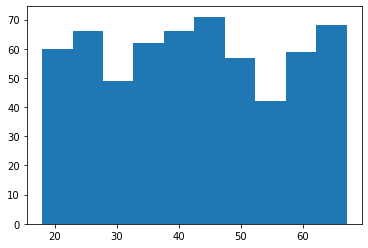

In [170]:
## Distribution of The Age Categories 
print("Number of Values in Each Age: ")

plt.hist(df.loc[:, "age"])

Distinct Values in the Pep Target Column: 
0    326
1    274
Name: pep, dtype: int64


(array([326.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 274.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

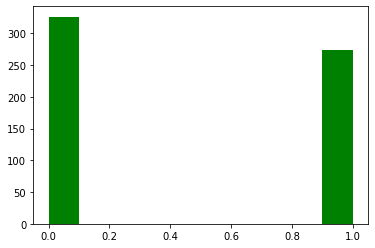

In [171]:
## Plotting Pep Column (Target Variable) 
print("Distinct Values in the Pep Target Column: ")
print(df.loc[:, "pep"].value_counts())

plt.hist(df.loc[:, "pep"], color = 'green')

Income Plot: 


(array([ 32., 106., 110., 108.,  76.,  62.,  35.,  36.,  21.,  14.]),
 array([ 5014.21 , 10825.799, 16637.388, 22448.977, 28260.566, 34072.155,
        39883.744, 45695.333, 51506.922, 57318.511, 63130.1  ]),
 <BarContainer object of 10 artists>)

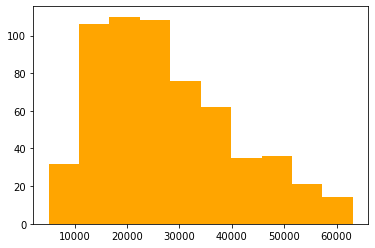

In [172]:
## Plotting Income
print("Income Plot: ")
plt.hist(df.loc[:, "income"], color = 'orange')

In [173]:
## Standardizing / Normalizing Values with StandardScaler -- only the Age and Income Columns 
for each in ['age', 'income']:
    column_df = pd.DataFrame(df_expanded.loc[:, each])
   # print(column_df)
    standardization_scale = StandardScaler().fit(column_df)
    column_df = pd.DataFrame(standardization_scale.transform(column_df))
    df_expanded.loc[:, each] = column_df[0]

In [174]:
## Updated Data frame:
df_expanded.describe()

,age,sex,income,married,car,save_act,current_act,mortgage,pep,children_None,children_One,children_Three,children_Two,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
count,6.000000e+02,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,-2.279658e-16,0.500000,2.590520e-17,0.660000,0.493333,0.690000,0.758333,0.348333,0.456667,0.438333,0.225000,0.113333,0.223333,0.448333,0.160000,0.103333,0.288333
std,1.000834e+00,0.500417,1.000834e+00,0.474104,0.500373,0.462879,0.428451,0.476840,0.498534,0.496597,0.417931,0.317264,0.416827,0.497738,0.366912,0.304648,0.453365
min,-1.692578e+00,0.000000,-1.746475e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.599922e-01,0.000000,-7.960089e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.740596e-02,0.500000,-2.016284e-01,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.919080e-01,1.000000,6.710246e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.707149e+00,1.000000,2.762577e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model

In [175]:
## Separating out Target Variable & Test/Train Sets 

col_names_list = list(df_expanded.columns)
col_names_list.remove("pep")

X = df_expanded.loc[:, col_names_list]
Y = df_expanded.loc[:, "pep"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                    test_size = 0.25, random_state = 99)

In [176]:
## Decision Tree Approach:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
np.random.seed(123)

## Generating Decision Tree Model
dec_tree_ent = DecisionTreeClassifier(min_samples_leaf=4, max_depth = 6)
model = dec_tree_ent.fit(X_train,y_train)

# Validate the model
y_predict = model.predict(X_test)

#def measure_performance(X_train, y_train)
acc = accuracy_score(y_test, y_predict) * 100
print("Decision Tree Method Accuracy is : {}%".format(acc))

Decision Tree Method Accuracy is : 86.0%


In [177]:
## Ensemble Model Approach:
from sklearn.ensemble import RandomForestClassifier

## Defining Model Parameters: 
nTrees = 100
max_depth = 6
min_node_size = 4
verbose = 0

## Generating Random Forest Classifier 
clf = RandomForestClassifier(n_estimators=nTrees, 
                             max_depth=max_depth,
                             random_state=0, 
                             verbose=verbose, 
                             min_samples_leaf=min_node_size)
clf.fit(X_train,y_train)


## Validating the model
y_predict2 = clf.predict(X_test)
Accuracy = [1 for i in range(len(y_predict2)) 
            if y_test.iloc[i] == y_predict2[i]]
Accuracy = round(float(np.sum(Accuracy))/len(y_predict2)*100,2)
print("Ensemble Method Accuracy on Testing Data = %.2f%%"%Accuracy)

Ensemble Method Accuracy on Testing Data = 86.67%


We can see that the Ensemble model approach increased the accuracy by a small amount, but still increased the overall accuracy. 

### 4. Graph the structure of your decision tree

[Text(922.25, 1009.5428571428572, 'children_One <= 0.5\ngini = 0.497\nsamples = 450\nvalue = [241, 209]\nclass = age'),
 Text(713.0, 854.2285714285715, 'income <= 1.748\ngini = 0.456\nsamples = 349\nvalue = [226, 123]\nclass = age'),
 Text(496.0, 698.9142857142858, 'married <= 0.5\ngini = 0.434\nsamples = 324\nvalue = [221, 103]\nclass = age'),
 Text(248.0, 543.6, 'children_None <= 0.5\ngini = 0.499\nsamples = 103\nvalue = [54, 49]\nclass = age'),
 Text(124.0, 388.28571428571433, 'income <= 0.219\ngini = 0.375\nsamples = 48\nvalue = [36, 12]\nclass = age'),
 Text(62.0, 232.97142857142865, 'age <= 0.389\ngini = 0.114\nsamples = 33\nvalue = [31, 2]\nclass = age'),
 Text(31.0, 77.65714285714284, 'gini = 0.067\nsamples = 29\nvalue = [28, 1]\nclass = age'),
 Text(93.0, 77.65714285714284, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = age'),
 Text(186.0, 232.97142857142865, 'children_Three <= 0.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]\nclass = sex'),
 Text(155.0, 77.65714285714284

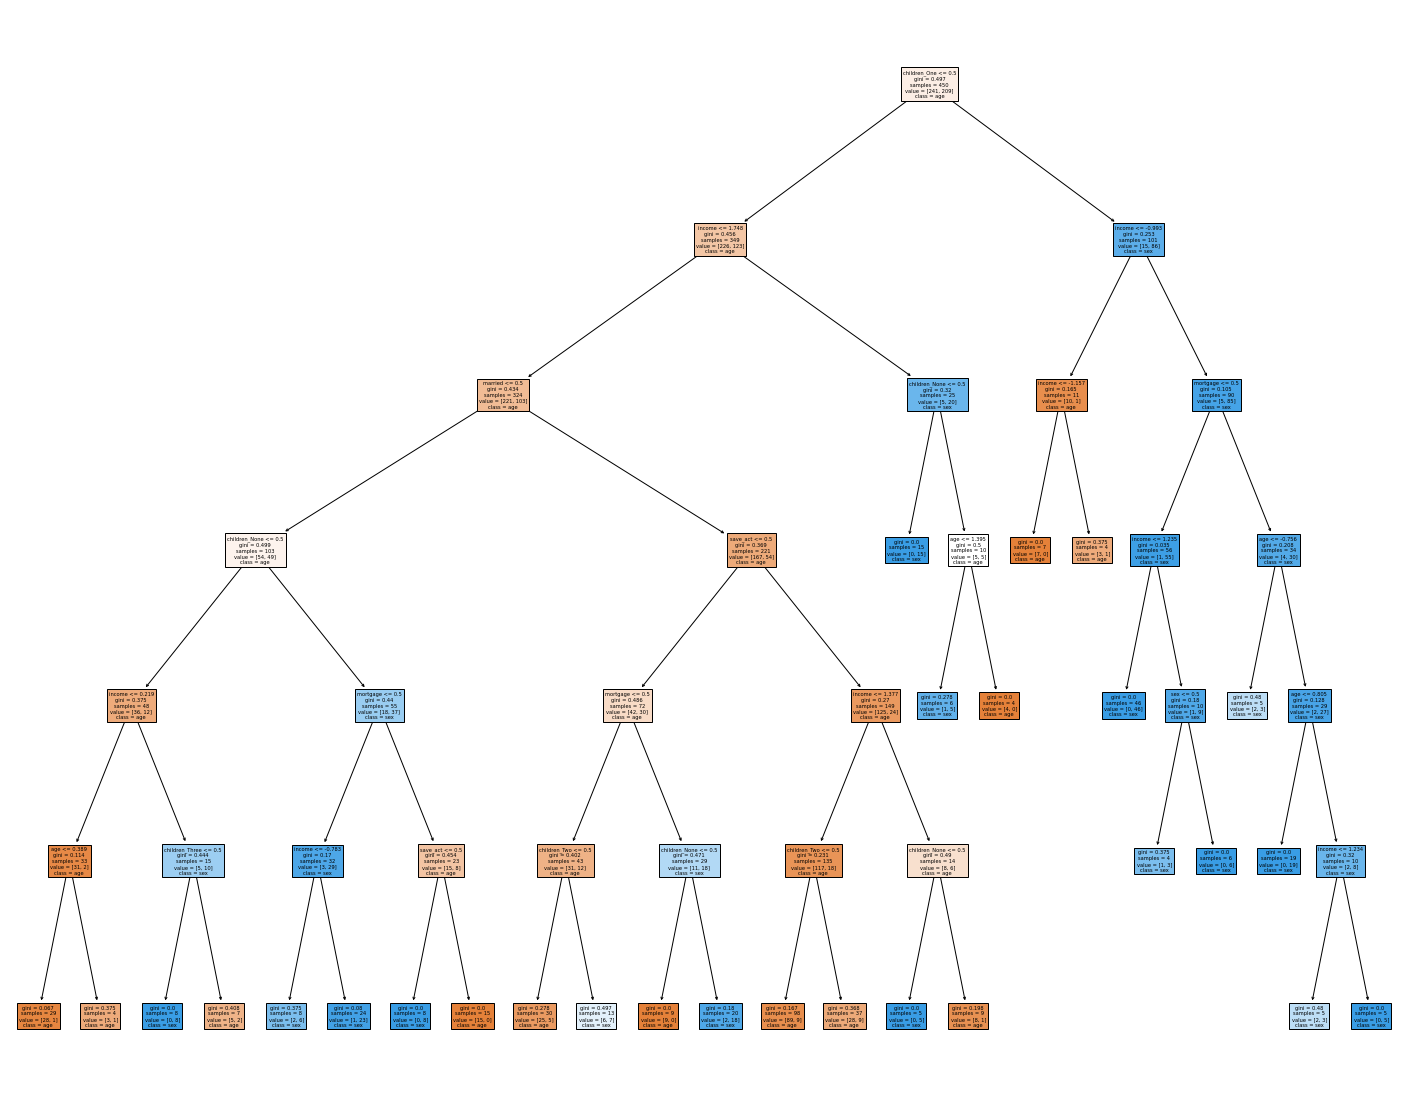

In [178]:
## Graphing Gini Decision Tree Model: 
fig = plt.figure(figsize=(25,20)) 
tree.plot_tree(model,
                   feature_names=col_names_list,  
                   class_names=col_names_list,
                   filled=True)

Top attributes in the decision tree model is "children_One", "Income", "Married", and then "children_None"

### 5. Graph the confusion matrix of your random forest model

In [179]:
## Defining Function to Plot Confusion Matrix (via Sklearn)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             Predicted No Pep  Predicted Pep
True No Pep                78              7
True Pep                   13             52


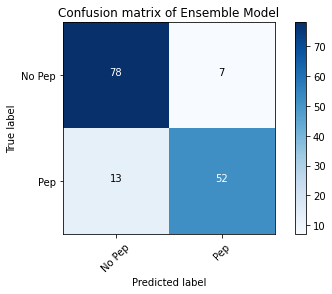

<Figure size 432x288 with 0 Axes>

In [180]:
## Printing and Plotting the Confusion Matrix for the Random Forest Ensemble Model: 
from sklearn.metrics import confusion_matrix
import itertools

print(pd.DataFrame(
    confusion_matrix(y_test, y_predict2),
    columns=['Predicted No Pep', 'Predicted Pep'],
    index=['True No Pep', 'True Pep']
))

cm = confusion_matrix(y_test, y_predict2)
plot_confusion_matrix(cm, classes=["No Pep", "Pep"],
                      title='Confusion matrix of Ensemble Model')
plt.figure()
plt.show()

### Summary

When comparing the performance of the decision tree model and the random forest ensemble model, there was approximately 0.67% increase in the accuracy. I attempted to keep the parameters similar between the models to better compare performance, however the models can be adjusted individually to increase performance and accuracy to be greater than 86.67%. In the Random Forest confusion matrix, we see that the model had more trouble with false negatives than false positives (13 vs 7). Even though the two models were similar in performance, the Random Forest classifier ultimately predicted more accurately. 